# Import libraries

In [114]:
from torchvision import datasets, transforms
from torch import nn,optim,utils,exp,mean,FloatTensor,no_grad
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Gathering the data

In [106]:
traindata=datasets.FashionMNIST('dataset/',download=True,train=True,transform=transforms.ToTensor())
testdata=datasets.FashionMNIST('dataset/',download=True,train=False,transform=transforms.ToTensor())

# Creating a loader to fetch 64 images at a time

In [107]:
trainloader=utils.data.DataLoader(traindata,batch_size=64,shuffle=True)
testloader=utils.data.DataLoader(testdata,batch_size=64,shuffle=True)

# Plot

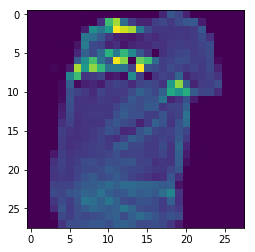

In [108]:
images,labels=next(iter(trainloader))
plt.imshow(images[61].numpy().squeeze())

# Forward Propagation object

#### hidden layer 1 : 256 neurons        activation : ReLU
#### hidden layer 2 : 128 neurons        activation : ReLU
#### hidden layer 3 : 64 neurons        activation : ReLU
#### output layer : 10 neurons                activation : Log Softmax
#### dropout probability : 0.2

In [120]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1=nn.Linear(784,256)
        self.hidden2=nn.Linear(256,128)
        self.hidden3=nn.Linear(128,64)
        self.output=nn.Linear(64,10)
        
        self.dropout=nn.Dropout(p=0.2)
    
    def forward(self,x):
        x=x.view(x.shape[0],-1)
        
        x=self.dropout(F.relu(self.hidden1(x)))
        x=self.dropout(F.relu(self.hidden2(x)))
        x=self.dropout(F.relu(self.hidden3(x)))
        x=F.log_softmax(self.output(x),dim=1)
        
        return x
model=Classifier()

# Backward Propagation objects

#### Loss function                :  Negative Log Likelihood Loss
#### Optimization algorithm : Adam optimizer

In [126]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

# Running the model

In [131]:
epoch=20
train_losses=[]
test_losses=[]
for e in range(epoch):
    running_loss=0
    for images,labels in trainloader:        
        optimizer.zero_grad()
        
        logits=model.forward(images)
        
        loss=criterion(logits,labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        with no_grad():
            model.eval()
            for images,labels in testloader:
                test_logits=model(images)
                test_loss+=criterion(test_logits,labels)
                
                ps=exp(test_loss)
                
                top_p,top_class=test_logits.topk(1,dim=1)
                equals=top_class==labels.view(top_class.shape)
                accuracy+=mean(equals.type(FloatTensor))
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(running_loss/len(testloader))
        print('Epoch: {}/{}'.format(e+1,epoch),
             'Train loss: {:.3f}'.format(running_loss/len(trainloader)),
             'Test loss: {:.3f}'.format(test_loss/len(testloader)),
             'Test Accuracy: {:.3f}%'.format((accuracy/len(testloader))*100))

Epoch: 1/20 Train loss: 0.320 Test loss: 0.375 Test Accuracy: 87.689%
Epoch: 2/20 Train loss: 0.320 Test loss: 0.386 Test Accuracy: 87.500%
Epoch: 3/20 Train loss: 0.319 Test loss: 0.373 Test Accuracy: 87.789%
Epoch: 4/20 Train loss: 0.315 Test loss: 0.385 Test Accuracy: 87.669%
Epoch: 5/20 Train loss: 0.322 Test loss: 0.401 Test Accuracy: 87.500%
Epoch: 6/20 Train loss: 0.320 Test loss: 0.371 Test Accuracy: 87.689%
Epoch: 7/20 Train loss: 0.311 Test loss: 0.373 Test Accuracy: 88.137%
Epoch: 8/20 Train loss: 0.314 Test loss: 0.371 Test Accuracy: 87.799%
Epoch: 9/20 Train loss: 0.320 Test loss: 0.383 Test Accuracy: 87.550%
Epoch: 10/20 Train loss: 0.315 Test loss: 0.408 Test Accuracy: 86.933%
Epoch: 11/20 Train loss: 0.307 Test loss: 0.380 Test Accuracy: 88.008%
Epoch: 12/20 Train loss: 0.312 Test loss: 0.378 Test Accuracy: 87.341%
Epoch: 13/20 Train loss: 0.306 Test loss: 0.398 Test Accuracy: 87.520%
Epoch: 14/20 Train loss: 0.307 Test loss: 0.387 Test Accuracy: 87.749%
Epoch: 15/20 Tr